# Control and Decision Making : Part I

### MSc Cesar Arturo Angeles Ruiz


## Introduction 

Generally, the aim of obtaining a model can be summarised in two main objectives: Acknowledge of a particular phenomenon and its behaviour to interact with it, or to make decisions that might influence a company and organisation, or even more, society. Whatever the objective, analising the current obtained model dynamics, assumptions and limitations is always the most important step to get to know how could it behave to different scenarios. 

In this laboratory, we will explore the ideas of investigating the dynamics of a phenomenon taking the ideas of control theory to observe and analise how will the model behave to several inputs. After exploring the time and space behaviour of a system, we will procede to generating small classic controllers that act as decisions that could be feedback to the phenomenon and take the ranges of validity or "stability" for the latter. Finally, we will use these parameters to implement and adaptive control capable of beating the classic decision making or control strategies, through a symbolic AI decision maker (Also know as fuzzy controller). At the end of the laboratory, we expect the student to have a general idea on how to analyse and implement such mathematical tools in order to gain insight of possible scenarios when taking certain actions according to an objective. 


## Model Analysis and Behaviour

After validation, our first task is to recognise what are the assumptions and limitations of our model as these will define important ranges of validity of the model. Having said that, even when the model might be partially described by the model, it is important to assume a full range of validity for the study as any non-linearity or stability will be found by our analysing tools and could lead to a biased response. 

To primarily focus on the procedure and the tools that comprise the analysis of a system, we well assume a only simple linear models obtained from data as more complex ones are out of the scope of this lecture. 

Imagine we got the following linear model from our data or made the assumption that our phenomenon followed the next dynamics: 

$$H(s) = \frac{S + 25}{S^2 + 15 S + 25}$$

Where are the poles and zeros of the system? Is it stable? How could you achieve maximum speed? Is it possible to get less to none error?!  

In order to answer these questions efficiently, we could use the control system module in python that can be get as:

 
```python
! pip install slycot   # optional
! pip install control
```

Whos utilisation was MatLab based and quite similar! Lets start by downloading the module and instanciating our transfer function. 



In [1]:
! pip install control

To start using the Python's Control Systems module you first need to include your analysis tools followed by the control module

In [1]:
# Your code here! 
import numpy as np
import pandas as pd
import control as cs
import matplotlib.pyplot as plt

Just as any dynamic system that we had inferred or developed, we can start by looking at its stability, position of poles ans zeros, response to different inputs (or test signals) and other properties! 

For the control systems module in python, we need to define the numerator and denominator as a coma-separated numpy array in the following manner! 


For example for the system above:
```python
num = np.array([1, 30.0])
den = np.array([1, 15., 25])
my_sys = cs.tf(num,den)

```

In [3]:
num = np.array([1, 25.0])
den = np.array([1, 15., 25])
my_sys = cs.tf(num,den)

We can observe our system transfer function in the S domain by running the variable allocated ``` my_sym```.

```python
my_sys

```


In [4]:
my_sys


    s + 25
---------------
s^2 + 15 s + 25

Also, we can start observing its properies by running class methods such as:

```python
## System descriprion 

cs.zero() # To calculate the zeros of the system
cs.pole() # To calculate poles of the system
cs.pzmap() # plots a representation of the open loop poles and zeros of the system

## System response

cs.impulse_response() # returns tuple of t,y of the impulse response of a system.
cs.step_response() # returns tuple of t, y for the step response

```
among others!


Investigate the poles, zeros and root locus of our hypothetical system. 

In [5]:
cs.zero(my_sys), cs.pole(my_sys)

(array([-25.]), array([-13.09016994,  -1.90983006]))

(array([-13.09016994,  -1.90983006]), array([-25.]))

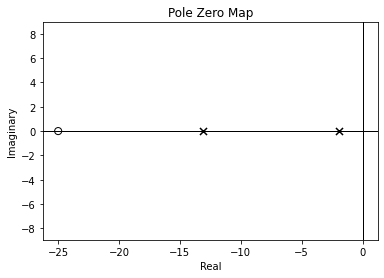

In [6]:
cs.pzmap(my_sys)

## System response time characteristics

As you may recall, the system response time depends on the poles closer to zero at the left hand side of the plane. However, the steady state error generally has an inverse response to the smallest of the poles within the system. 

Imagine you need to implement the __most efficient__ controller to our plant. You have two choices: you can go to a fastest but error prone reponse with a P controller. 

You can also choose a zero error but slow PI controller. 


For example: 
If we were to implement a simple K controller we could just use the __open loop transfer function__ $ H(S)G(S) $ and to serialise the controller with the system in the following manner:

If:

$$ H(s) = \frac{S + 25}{S + 15S + 25} $$

And our controller:

$$ C(S) = Kp $$

Serialise it as:

$$ G(S)H(S)  = Kp \frac{S + 25}{S + 15S + 25} $$

```python
## System descriprion 
g_s_h_c = cs.serial(kp, my_sys)


```

What is the new root_locus of our system?! Calculate the step and impulse response! What would be the final error to a changing input and a constant reference input?!

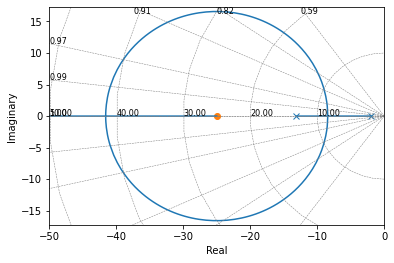

In [7]:
#plt.plot(cs.root_locus(my_sys)[:,1], '*')
n1, k = cs.root_locus(my_sys, xlim=[-50,0])
kp = k[(n1<= [-30, 0.]).all(axis = 1)][0]

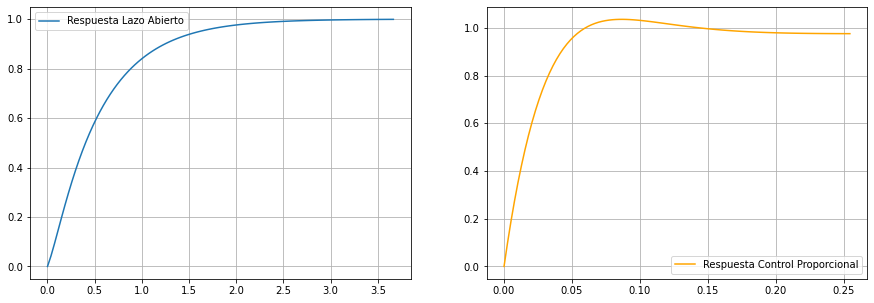

In [8]:
controller = cs.tf(np.array([40]), np.array([1.]))
controller
controlled = cs.series(my_sys, controller)
controlled
fb = cs.feedback(controlled)
t, s = cs.step_response(my_sys)
t1, y = cs.step_response(fb)

fig = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(t, s,label='Respuesta Lazo Abierto')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t1, y,label='Respuesta Control Proporcional',c='orange')
plt.grid()
plt.legend()

## Zero Steady-State Error Controller


Now, as observed, the simple k controller is fast but gives us steady state error! What if we needed a system whose error is the closes to 0 we could have?! 

We could always use a KI controller and make sure we have 0 error in exchange of a slowest (and sometimes even never-converging system 🥺). 

Try generating your own __PI controller__ and observe! Will it converge at some finite time tss? What is the real steady state error?! Which pole will you cancel for it to make it as efficient if possible?! 

In [9]:
## Your code for a KI controller transient response, poles and zeros and steady state error

controllerPI = cs.tf(np.array([0., 1., 1.90983006]), np.array([0., 1., 0.]))
controlledPI = cs.series(my_sys, controllerPI)
ki = cs.tf(np.array([40]), np.array([1.]))
controlledPI = cs.series(controlledPI,ki)
controlledPI


40 s^2 + 1076 s + 1910
----------------------
  s^3 + 15 s^2 + 25 s

In [10]:
cs.zero(controlledPI), cs.pole(controlledPI)

(array([-25.        ,  -1.90983006]),
 array([-13.09016994,  -1.90983006,   0.        ]))

(array([-13.09016994,  -1.90983006,   0.        ]),
 array([-25.        ,  -1.90983006]))

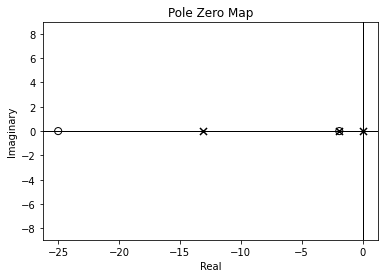

In [11]:
cs.pzmap(controlledPI)

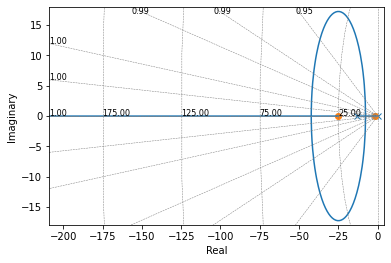

In [12]:
roots, gains = cs.root_locus(controlledPI)

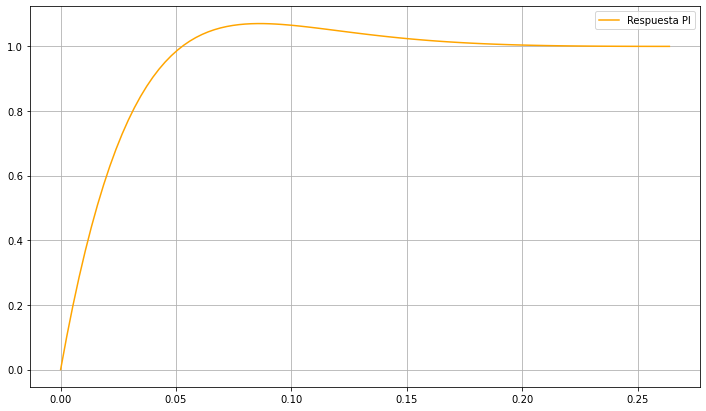

In [13]:
PI = cs.feedback(controlledPI)
t_PI, y_PI = cs.step_response(PI)

plt.figure(figsize=(12,7))
plt.plot(t_PI, y_PI, label='Respuesta PI',c='orange')
plt.grid()
plt.legend()

In [14]:
#Error a rampa
s = 0
Kr = (40*((s + 1.90983006)*(s + 25)))/((s + 13.09016994)*(s + 1.90983006))
error_Rampa = 1/Kr
print('El error en estado estable a una rampa es:',error_Rampa)

El error en estado estable a una rampa es: 0.01309016994


El error en estado estable al escalón unitario es = 0, ya que nuestro sistema se convirtió en un sistema de tipo 1

### Extracting controller gains 

It turns out that using a model such as our hypothetical one we can experimentally calculate the gain that our controller needs in order to get to particular roots of the transfer function. 

Recall the function ``` cs.root_locus() ```. If we observe towards the returned values, we can see that it returns a tuple comprised of the path of several samples within the root locus and the several gains used to calculate them. 

By using arrays slices and mask we can extract the different values for K for which  a certain condition is met! 

Try extracting the fastest value of Kp for the system and plot its root locus and the impulse and step response.


#### Hint:

Array conditions and masks in Python are exactly the same as in Matlab: 

E.g
```python
x[x > 5] # returns a mask of all values greater than 5 and so on. 
x[y > 5] # returns values for x under a condition in y.

```

Try it yourself! 

In [15]:
h = roots[roots==roots.min()]
h = h.real.item()
ki_fast = gains[(roots <= [h, 0.,0.]).all(axis = 1)][0]

h2 = n1[n1==n1.min()]
h2 = h2.real.item()
kp_fast = k[(n1 <= [h2, 0.]).all(axis = 1)][0]

print(ki_fast, kp_fast)

5457.925010908319 207937.56201888845


In [16]:
controller_2 = cs.tf(np.array([kp_fast]), np.array([1.]))
controlled_2 = cs.series(my_sys, controller_2)
controlled_2


2.079e+05 s + 5.198e+06
-----------------------
    s^2 + 15 s + 25

In [17]:
#Obtencion error en edstado estable a escalon con Kp_fast
s = 0
Kv = ((2.079*10**5)+ 5.198*10**6)/(s**2 + 15*s + 25)
error_2 = 1/(1+Kv)
error_2

4.624555464605965e-06

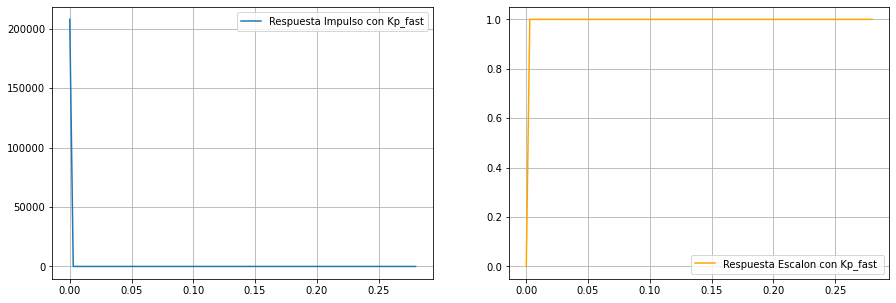

In [18]:
fb_2 = cs.feedback(controlled_2)
t_2, s_2 = cs.impulse_response(fb_2)
t1_2, y_2 = cs.step_response(fb_2)

fig = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(t_2, s_2,label='Respuesta Impulso con Kp_fast')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t1_2, y_2,label='Respuesta Escalon con Kp_fast ',c='orange')
plt.grid()
plt.legend()

In [19]:
#Controlador PI con ki rapida
controllerPI_2 = cs.tf(np.array([0., 1., 1.90983006]), np.array([0., 1., 0.]))
controlledPI_2 = cs.series(my_sys, controllerPI_2)
ki_fast = cs.tf(np.array([ki_fast]), np.array([1.]))
controlledPI_KiFast = cs.series(controlledPI_2,ki_fast)
controlledPI_KiFast


5458 s^2 + 1.469e+05 s + 2.606e+05
----------------------------------
        s^3 + 15 s^2 + 25 s

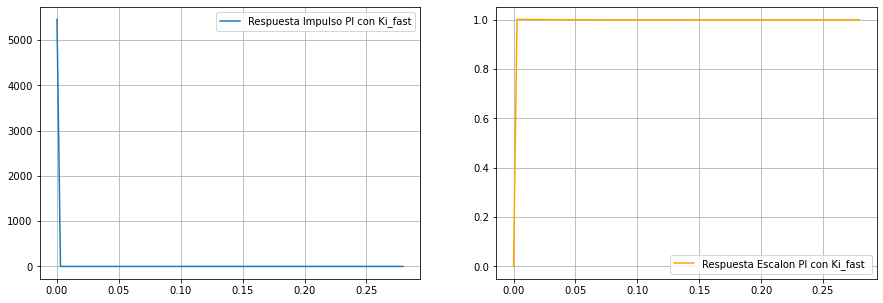

In [20]:
## Your compensator code here! 
PI_Kifast = cs.feedback(controlledPI_KiFast)
tk_i, i = cs.impulse_response(PI_Kifast)
tk_s, s = cs.step_response(PI_Kifast)

fig = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(tk_i, i,label='Respuesta Impulso PI con Ki_fast')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tk_s, s,label='Respuesta Escalon PI con Ki_fast ',c='orange')
plt.grid()
plt.legend()

## Symbolic Control 

### Fuzzy Logic Adaptive Control

It turns out that whenever we have a complex task or quite a few strict requirements within our control, we can start using more specialised theories to fit our system response. Just as seen in the theory, on of them comes from a symbolic perspective (logic and sets) for the definition of the distinct regions of behaviour it may have. 

__Fuzzy control__ ideas come from logic and symbolic philosophy in order to take decisions among distinct parameters within a system. Due to its versatility and human-centred type of thinking, it has several benefits over classic and more modern control implementations: 

- Easy to desing 
- Easy to understand
- Allow to control not-known dynamics
- It can control non-linear systems
- It can augment systems' performance as no other classic controller can. 

For these reasons fuzzy control may be considered as one of the firsts "intelligent" (more than intelligent, adaptive) control system or decision making mechanism. 

In this part of the lab, we will observe the benefit of a fuzzy logic controller taking as an example our hypothetical obtained model. After that, as part of our challenges, we will try to control the real __data-obtained__ motor transfer function to see if the heat can be controlled under certain parameters. 

## Designing an Adaptive Fuzzy logic controller

To start up with, if we recall, the first things we need to obtain in order to start designing our control are the following: 

* The assumed model of our system.
* The input-output characteristics and possible response to these inputs.
* The ranges of the error and their rate of change.
* The domain of the controlled signals and the range of the controlled outputs. 


You can extract and easily explore those using classic system dynamics theory and our control system toolbox. You can explore the response to a particular input by using the python function:

```python 
cs.forced_response(sym, t, u)
```

This function recieves the system sym, followed by the time vector and a time-specified input vector u. Allowing you to observe the behaviour of a system as u evolves in time. 

In this way, the error calculation to several reference signals can be easily calculated. 


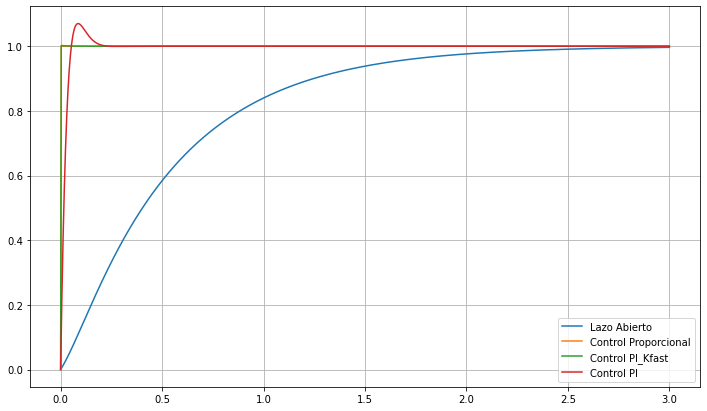

In [26]:
espacio_t = 1000
t_fr = np.linspace(0, 3, espacio_t)
u_fr = np.ones(espacio_t)
t3, y3, x3 = cs.forced_response(my_sys, T=t_fr ,U=u_fr)
t4, y4, x4 = cs.forced_response(fb_2, T=t_fr, U=u_fr)
t5, y5, x5 = cs.forced_response(PI_Kifast, T=t_fr, U=u_fr)
t6, y6, x6 = cs.forced_response(PI, T=t_fr, U=u_fr)

plt.figure(figsize=(12,7))
plt.plot(t3,y3,label='Lazo Abierto')
plt.plot(t4,y4,label='Control Proporcional')
plt.plot(t5,y5,label='Control PI_Kfast')
plt.plot(t6,y6,label='Control PI')
plt.legend()
plt.grid()

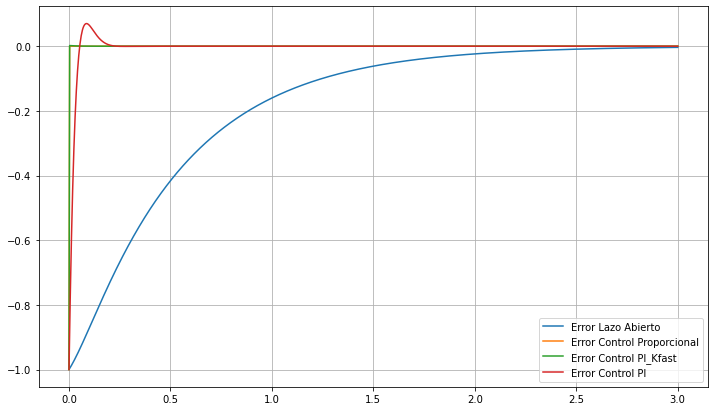

In [22]:
# Try calculating a system response via the forced function and calculate the error between reference
# and desired signal 
error_LazoAbierto = y3 - u_fr 
error_PI_Kfast = y5 - u_fr 
error_PI = y6 - u_fr
error_ControlP = y4 - u_fr

plt.figure(figsize=(12,7))
plt.plot(t3,error_LazoAbierto,label='Error Lazo Abierto')
plt.plot(t4,error_ControlP,label='Error Control Proporcional')
plt.plot(t5,error_PI_Kfast,label='Error Control PI_Kfast')
plt.plot(t6,error_PI,label='Error Control PI')
plt.legend()
plt.grid()

## Fuzzy Sets and Knowledge Base

After gathering all the system information on stability and characteristics we can readily start designing our fuzzy variables for our control. Remember that each variable is conformed of the {var_name, domain, mem_fun}
where the domain are the values for which the membership function is defined and mem_fun, defines its shape. 

### Main Components 

The fuzzy controller is comprised of three main components: __the fuzzifier, the knowledge base and the defuzzifier__. 

Both fuzzyfier and defuzzifier work under the same dynamics and reverse order. They define the degrees of membership each input and output has. The Knowledge base generates a set of rules that maps each input membership function to an output membership function. This allows for the posterior aggregation of partial responses among the output contributions to generate a quantitative response from a qualitative __premise__.

<img src="imgs/fpid.jpg" alt="Drawing" style="width:500px;"/>

### Membership Function 

For systems where time is of critical importance or embedded systems, easy membership functions are encouraged to be applied to. Most of the time, simple triangular functions will be enough for this to work. However, more complex functions can robust our controller by expanding their domain in case non-expected or outlier behaviours are exhibited. Remember that most of membership functions are PDFs, so they will have a maximum range of 0 to +1. 

e.g. 

Imagine out error support goes from -5 to 5 at the input signal. Also, suppose we will give support to only three distinct fuzzy set conditions: __Negative, zero and positive errors.__ If we were to use triangular functions we well need to define a range of: 

__{error, [-5, 5], {N,Z,P}}__



In [23]:
def tri(x, support = 1, lag = 0, peak = 1):
    l = len(x)
    y = np.zeros(l)
    m = peak/(support)
    y[(x >= lag) & (x <= support+lag)] = -m * (x[(x >= 0) & (x <= support)]) + peak
    y[(x >= lag-support) & (x <= lag)] = m * (x[(x >=-support) & (x <= 0)]) + peak
    return y



[0.]


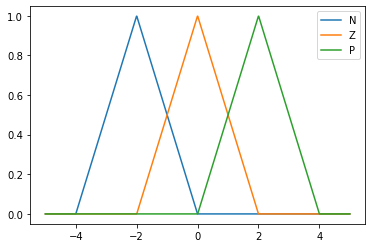

In [24]:
x = np.linspace(-5,5,1000)
Z = tri(x, 2, 0, 1)
N = tri(x, 2, -2, 1)
P = tri(x, 2, 2, 1)
plt.plot(x, N, label = "N")
plt.plot(x, Z, label = "Z")
plt.plot(x, P, label = "P")
plt.legend()
tp = np.array([2])
z = tri(tp, 2, 0, 1)
print(z)

## Knowledge base 

The Knowledge base is a set of rules that map the evaluated membership functions towards output function ranges. They are mainly proposed from expert area knowledge or can be consulted through tables. 

In 1976, __MacVicar Whelan__ proposed a knowledge base that works well for the __Incremental Fuzzy PID__ controller, which receives the error and its rate of change to take decisions towards which is the best action for the system to be controlled. 

For our system, this knowledge base looks as follows: 

| e'/ e  | N | Z | P |
| :- | -: | :-: | :-:| 
| __N__ | NB | NS | Z |
| __Z__ |  NS | Z | PS | 
| __P__ |  Z | PS | PB | 

Where:

* __e'__: error rate of change
* __e__ : error
* __N, Z, P__ : Error and error rate membership functions
* __NB, NS, Z, PS, PB__ : Membership functions for the rate of change in the control signal $\frac{du(t)}{dt}$


Once explored the valid range of the input control signals __$u(t)$__ we can proceed setting the output membership functions for the __defuzzifier__. Remember that the output range can only be greater or equal than the input membership domains, otherwise the system input will exhibit a wind-up behaviour that might not be desired. 


## Defuzzifier

The diffuzifier is the latest subsystem of our controller. The process of __defuzzification__ corresponds to the quantfication of the input applied rules to generate quantitative (also known as crisps) outputs to the control signals of the system. In order for this to happen, we need to stablish an aggregating type of function which will decide the contribution of each subset to the final response known as __implication functions__. Although several of these exists, the most common aggregating functions are __mandami and larson__, which select the domain of the input to be applied and propagated through the rules. For simplification, we will use mandami implication functions in order to control our system. 

__Mandami implication functions__ work under the premise to select the maximum (AND) and minimum for (OR) among evaluated input membership functions. This because they collapse several contributions into a single one. This is really conveninent for when we have low power processing units. 

The way mandami functions operate is to select from the evaluated inputs the minimum value and propagate it towards the range of the output membership functions as so:


<img src="imgs/imp.png" alt="Drawing" style="width:500px;"/>



Then the overall contributions of each particular input subset gets minimised to generate an Underlying output area for which the output of the defuzzfier is chosen. From the most common methodologies there exist two main aggregating functions __MOM__ and __COM__, among others.

* MOM (Mean of Maximums): Pick the x value for which the meand values of particular peaks are calculated.
* COM (Centre of Mass): Calculated as the moment in the x axis for which the centre of mass decays. 

While the MOM can have an undefined behaviour and extra computation for valleys within the function, COM has been demostrated good performance not affected by this! For that reason it is widely used for the computation of the defuzzifying system. 

Remember that the centre of mass within a function can be calculated as:

$$ M_x = \frac{1}{A} \int_{a}^{b}{xf(x)} dx  $$ Centre of Mass in the X direction

where:

$$ A = \int_{a}^{b}{min(f(x))dx}$$

In this manner, just as shown on the previous figure, the centroid is said to belong to the maximum descripton of the overall system response.



## PID Fuzzy Adaptive Control 

To finish up with the design, the output membership functions correspond to the values of Kp and Ki that the system finds more optimum for a particular variables as a function of the __error__. For that reason, it is always easier to evaluate the system response to __Kp and Ki__ controllers separately and spot the distinct regions for which speed or final value are important. Once these values are defined, then, using fuzxy logic, the system can selectively choose which controller acts better depending on the situation that encounters. Ending up with a system that looks with the following topology:

<img src="imgs/adaptive.png" alt="Drawing" style="width:400px;"/>

It has been demonstrated that fuzzy controllers can reach better performance than classic and some modern controls. Nevertheless, their desing gets complex when the plant might not be linear or known to be controllable! 

For these systems __Artificial Intelligence__ propose more powerful theories and methodologies. Theories that are set completely by historical data rather than human desing. Having said that, fuzzy control allows for a fast, easy and comprehensible way of design complex control, being delved as precursors of for what is know as an __Intelligent System.__

# Final Exercise 

### Implement a Fuzzy control for our hypothetical plant and compare it with simple P and PI controllers!

What do you observe? Which one is faster? Which one is optimal in error? 

In [27]:
def triangular(x, alfa, beta, delta):
    
    if (x >= alfa) & (x <= beta):
        y = (x-alfa)/(beta-alfa)
        
    elif (beta <= x) & (x <= delta):
        
        y = (x-delta)/(beta-delta)
    else:
        y = 0
    
    return y    

In [55]:
## Implement your fuzzy control system!
j = 0
#y = []
for i in enumerate(error_LazoAbierto):
    e = error_PI_Kfast[j]
    
    if(e < -0.01):
        y.append(triangular(e, -1.5, -0.5, 0.01))
        #y = triangular(e, -1.5, -0.5, 0.01)
    elif(e == 0):
        y.append(triangular(e, 0, 0, 0))
        #y = triangular(e, 0, 0, 0)
    elif(e > 0.01):
        y.append(triangular(e, 0.01, 0.5, 1.5))
        #y = triangular(e, 0.01, 0.5, 1.5)
    
    j = j+1


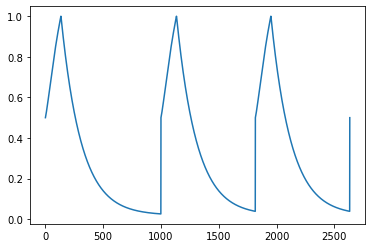

In [56]:
plt.plot(y)

We hope this really sets the foundations towards the need of better modelling and control system strategies! This is all for this lab! Hope you enjoyed! 

### Until next time!
